# 회귀로 몸무게 예측하기
* 주어진 데이터를 바탕으로 펭귄 몸무게 예측하기

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')


%matplotlib inline

# 데이터 불러오기

In [2]:
import pandas as pd

# csv 형식으로 된 데이터 파일을 읽어옵니다.
df= pd.read_csv('dataset/train.csv')

# 데이터의 최상단 5 줄을 표시합니다.
df.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


# 데이터 전처리

In [3]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_num = sum(dataframe[col].isna())
        is_missing = True if missing_num >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_num}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
            # print(missing_col)
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.


# 학습, 예측 데이터셋 만들기

In [4]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = df.columns.tolist()

feature_names

# should  ignore 'id' and  'Body Mass (g)'

['id',
 'Species',
 'Island',
 'Clutch Completion',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Sex',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)',
 'Body Mass (g)']

In [5]:
feature_names = [
 'Species',
 'Island',
 'Clutch Completion',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Sex',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

label_name = "Body Mass (g)"

In [6]:
X = df[feature_names]
y = df[label_name]

X.shape, y.shape

((114, 9), (114,))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
# Sex,Clutch Completion 는 male은 1, female은 0, Yes 는 1, No 는 0으로 처리
X_train['Sex']=np.where(X_train['Sex'].values=='MALE',1,np.where(X_train['Sex'].values=='FEMALE',0,np.nan))
X_train['Clutch Completion']=np.where(X_train['Clutch Completion'].values=='Yes',1,0)
# Island와 Species는 원 핫 인코딩으로 처리
train = pd.concat([X_train,pd.get_dummies(X_train[['Island','Species']])],axis=1)
X_train_trans1 = train.drop(['Island','Species'],axis=1)
X_train_trans1 

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua)
31,1,52.2,18.8,197,1.0,9.77528,-24.56481,0,1,0,0,1,0
67,1,49.2,15.2,221,1.0,8.27376,-25.00169,1,0,0,0,0,1
111,1,43.2,18.5,192,1.0,8.97025,-26.03679,0,1,0,1,0,0
108,1,49.0,19.6,212,1.0,9.34089,-24.45189,0,1,0,0,1,0
22,1,43.5,15.2,213,0.0,8.21634,-26.11046,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,45.5,15.0,220,1.0,8.63604,-26.74890,1,0,0,0,0,1
14,1,41.1,18.2,192,1.0,8.62264,-26.60023,1,0,0,1,0,0
92,1,45.2,14.8,212,0.0,8.24246,-26.11969,1,0,0,0,0,1
51,0,43.5,18.1,202,0.0,9.37608,-24.40753,0,1,0,0,1,0


## 결측치 처리

In [9]:
X_train_trans1['Delta 13 C (o/oo)'].iloc[np.where(X_train_trans1['Delta 13 C (o/oo)'].isnull()==True)] = [ 0, 0]
X_train_trans1['Delta 15 N (o/oo)'].iloc[np.where(X_train_trans1['Delta 15 N (o/oo)'].isnull()==True)] = [ 0, 0]
# assume all the NaN value in "Sex" is FEMALE, 0
X_train_trans1['Sex'].iloc[np.where(X_train_trans1['Sex'].isnull()==True)] = [ 0, 0]

In [10]:
missing_col_X_train_trans1 = check_missing_col(X_train_trans1)

결측치가 존재하지 않습니다


# 머신러닝 알고리즘 가져오기
1. 로지스틱 회귀


In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# 학습(훈련)
* (X_train)와 정답(y_train)을 활용하고 학습하는 과정

In [20]:
logreg = logreg.fit(X_train_trans1, y_train)

In [19]:
print("테스트 점수 : {:.2f}".format(logreg.score(X_train_trans1, y_train)))

테스트 점수 : 0.33


# cross validation 으로 학습 세트의 오차 측정하기

In [22]:
# train set와 valid set를 나눠 cross validation으로 train set으로 학습한 모델을 검증합니다.
# cv=5 , 5 cross validation
# test 점수를 예측하기 전에 
from sklearn.model_selection import cross_val_predict

y_cross_valid_predict = cross_val_predict(logreg,X_train_trans1, y_train, cv=3, verbose=1, n_jobs=-1)
y_cross_valid_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished


array([3250, 5000, 3900, 3950, 4700], dtype=int64)

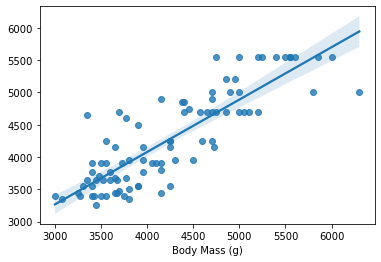

In [23]:
sns.regplot(y_train, y_cross_valid_predict)

# 모델 평가

In [24]:
# r2_score 를 구합니다. 1에 가까울 수록 정확도가 높습니다.
# 0.75 이상의 값이 나오는지 확인합니다.

from sklearn.metrics import r2_score

r2_score(y_train, y_cross_valid_predict)

#r2 score is the correlation score
#if get 1.0 is the best, means the closest 
# 0.7166222937318367 -> less than 0.75, very terrible!

0.7166222937318367

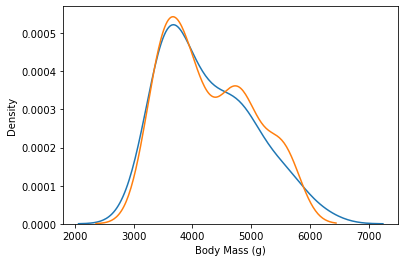

In [25]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

sns.distplot(y_train, hist=False, label="train")
sns.distplot(y_cross_valid_predict, hist=False, label="predict")

In [14]:
# Sex,Clutch Completion 는 male은 1, female은 0, Yes 는 1, No 는 0으로 처리
X_test['Sex']=np.where(X_test['Sex'].values=='MALE',1,np.where(X_test['Sex'].values=='FEMALE',0,np.nan))
X_test['Clutch Completion']=np.where(X_test['Clutch Completion'].values=='Yes',1,0)
# Island와 Species는 원 핫 인코딩으로 처리
valid_set = pd.concat([X_test,pd.get_dummies(X_test[['Island','Species']])],axis=1)
X_valid_trans1 = valid_set.drop(['Island','Species'],axis=1)
X_valid_trans1

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua)
80,1,39.7,18.4,190,1.0,9.29808,-25.23453,0,0,1,1,0,0
4,0,49.6,16.0,225,1.0,8.38324,-26.84272,1,0,0,0,0,1
40,1,44.4,17.3,219,1.0,8.13746,-26.79093,1,0,0,0,0,1
69,1,50.0,15.9,224,1.0,8.20042,-26.39677,1,0,0,0,0,1
10,1,52.8,20.0,205,1.0,9.25177,-24.69638,0,1,0,0,1,0
45,1,45.4,14.6,211,0.0,8.24515,-25.46782,1,0,0,0,0,1
70,1,46.2,14.4,214,NaN,8.24253,-26.81540,1,0,0,0,0,1
66,1,54.3,15.7,231,1.0,8.49662,-26.84166,1,0,0,0,0,1
47,1,41.0,20.0,203,1.0,9.01079,-26.38085,1,0,0,1,0,0
11,1,36.2,17.3,187,0.0,8.90723,-26.30037,0,1,0,1,0,0


In [16]:
missing_col_X_valid_trans1= check_missing_col(X_valid_trans1)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 1개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 1개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 1개의 결측치가 존재합니다.


In [17]:
X_valid_trans1['Delta 13 C (o/oo)'].iloc[np.where(X_valid_trans1['Delta 13 C (o/oo)'].isnull()==True)] = [0]
X_valid_trans1['Delta 15 N (o/oo)'].iloc[np.where(X_valid_trans1['Delta 15 N (o/oo)'].isnull()==True)] = [0]
# assume all the NaN value in "Sex" is FEMALE, 0
X_valid_trans1['Sex'].iloc[np.where(X_valid_trans1['Sex'].isnull()==True)] = [0]

In [18]:
missing_col_X_valid_trans1= check_missing_col(X_valid_trans1)

결측치가 존재하지 않습니다


In [26]:
print("테스트 점수 : {:.2f}".format(logreg.score(X_valid_trans1,y_test)))

테스트 점수 : 0.13


# test_data 예측하기

In [27]:
# 우리가 예측하고자 하는 test 데이터를 불러옵니다.
df_test = pd.read_csv('dataset/test.csv').drop(['id'],axis=1)

df_test.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [28]:
# Sex,Clutch Completion 는 male은 1, female은 0, Yes 는 1, No 는 0으로 처리
df_test['Sex']=np.where(df_test['Sex'].values=='MALE',1,np.where(df_test['Sex'].values=='FEMALE',0,np.nan))
df_test['Clutch Completion']=np.where(df_test['Clutch Completion'].values=='Yes',1,0)
# Island와 Species는 원 핫 인코딩으로 처리
test = pd.concat([df_test,pd.get_dummies(df_test[['Island','Species']])],axis=1)
X_test_trans1 = test.drop(['Island','Species'],axis=1)
X_test_trans1

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua)
0,1,52.0,20.7,210.0,1.0,9.43146,-24.68440,0,1,0,0,1,0
1,1,55.9,17.0,228.0,1.0,8.31180,-26.35425,1,0,0,0,0,1
2,1,38.9,18.8,190.0,0.0,8.36936,-26.11199,0,1,0,1,0,0
3,1,45.2,16.6,191.0,0.0,9.62357,-24.78984,0,1,0,0,1,0
4,0,37.9,18.6,172.0,0.0,8.38404,-25.19837,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1,49.3,19.9,203.0,1.0,9.88809,-24.59513,0,1,0,0,1,0
224,1,46.5,14.8,217.0,0.0,8.58487,-26.59290,1,0,0,0,0,1
225,1,46.5,13.5,210.0,0.0,7.99530,-25.32829,1,0,0,0,0,1
226,1,50.5,19.6,201.0,1.0,9.80590,-24.72940,0,1,0,0,1,0


In [29]:
missing_col_test = check_missing_col(X_test_trans1)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 6개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 9개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 8개의 결측치가 존재합니다.


In [30]:
X_test_trans1['Delta 13 C (o/oo)'].iloc[np.where(X_test_trans1['Delta 13 C (o/oo)'].isnull()==True)] = [ 0, 0, 0, 0, 0, 0, 0, 0]
X_test_trans1['Delta 15 N (o/oo)'].iloc[np.where(X_test_trans1['Delta 15 N (o/oo)'].isnull()==True)] = [ 0, 0, 0, 0, 0, 0, 0, 0, 0]
# assume all the NaN value in "Sex" is FEMALE, 0
X_test_trans1['Sex'].iloc[np.where(X_test_trans1['Sex'].isnull()==True)] = [ 0, 0, 0, 0, 0, 0]

In [31]:
missing_col_test = check_missing_col(X_test_trans1)

결측치가 존재하지 않습니다


In [32]:
# 위에서 찾은 best_estimator 를 통해 실제값을 예측합니다.
y_predict = logreg.predict(X_test_trans1)
y_predict[:5]

#y_pred = model.predict(X_test) >> this is what did b4
#this time choose the best_estimator dulu

array([3950, 5850, 3400, 3650, 3550], dtype=int64)

In [33]:
y_predict

array([3950, 5850, 3400, 3650, 3550, 3250, 4700, 5550, 4750, 3900, 3800,
       4700, 4700, 4700, 4750, 5000, 3250, 3550, 3400, 3800, 4250, 5000,
       5550, 3950, 3650, 4700, 3400, 3700, 3900, 4750, 3550, 5000, 3650,
       4750, 3450, 3550, 4750, 3550, 4250, 4700, 3800, 3400, 4250, 4700,
       3700, 4750, 3400, 4250, 4700, 5550, 3750, 3900, 3400, 3675, 4150,
       4250, 4700, 3550, 4700, 4150, 3450, 3400, 3450, 5000, 3400, 4250,
       3400, 4900, 3550, 3450, 5000, 3400, 3400, 3950, 5550, 4150, 3400,
       3450, 5000, 5000, 4250, 3700, 4150, 5000, 5000, 3800, 5000, 4150,
       3400, 4700, 4700, 3800, 3400, 3400, 3400, 3650, 3400, 3400, 4400,
       3800, 3250, 3650, 3400, 5000, 5850, 3650, 5550, 5550, 3675, 3400,
       4700, 3400, 3400, 3900, 5000, 3450, 3400, 3950, 3900, 3900, 3650,
       5550, 3400, 4150, 3950, 4250, 5000, 3900, 3400, 3950, 3800, 3400,
       5550, 5000, 4700, 4250, 3550, 3400, 4700, 3450, 4250, 4700, 3400,
       3400, 3400, 3650, 4750, 3400, 5550, 4150, 55

# dacon 대회에 제출하기

이제 이 예측 결과를 submission.csv 파일로 만들어서 대회 페이지에 제출해보도록 합시다.

제출한 뒤 리더보드를 통해 결과를 확인합시다.

In [34]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('dataset/sample_submission.csv')
submission.head()

,id,Body Mass (g)
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [35]:
print(submission.shape)
print(y_predict.shape)

(228, 2)
(228,)


In [36]:
# 위에서 구한 예측값을 그대로 넣어줍니다.
submission['Body Mass (g)'] = y_predict

# 데이터가 잘 들어갔는지 확인합니다.
submission

,id,Body Mass (g)
0,0,3950
1,1,5850
2,2,3400
3,3,3650
4,4,3550
...,...,...
223,223,3950
224,224,4700
225,225,4750
226,226,3950


In [37]:
submission.to_csv("submission_20220103_v2.csv", index=False)